In [1]:
#IMPORT LIBRARY
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups

In [2]:
#FETCH DATA
data = fetch_20newsgroups()
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
#MAKE A VOCA LIST
vocab_set = set()
for dstr in train.data:
    words = dstr.lower().split()
    vocab_set.update(words)
new_vocab = list(vocab_set)

In [4]:
#CREATE DIC FOR STORING 
vocabcount_category = {category: {v: 0 for v in new_vocab} for category in categories}
vocab_logp_category= {category: {key: 0 for key in new_vocab} for category in categories}

In [5]:
vocabcount_category

{'alt.atheism': {'sugarman@ra.cs.umb.edu': 0,
  '127.0.0.1': 0,
  'dwarfed': 0,
  'visibilitynotify': 0,
  'dormitory': 0,
  'invade.': 0,
  "m=g9v=a,3=g92e3,s,ud'!p<'!p<'!ue9$0<'!p<1$1$1$5e963,s69524e)2": 0,
  '[athena,': 0,
  'rd(3)': 0,
  'calamari.hi.com': 0,
  '16:16': 0,
  'civilles': 0,
  '(business)': 0,
  '<finaid2@auvm.american.edu>': 0,
  'hamstring': 0,
  '>=-': 0,
  '386/25mhz': 0,
  'm--*1?f&>2/"ug.k@0o;\\9f*&safs7b&kn-f2!k^8\\]d`/zmihg!*[!s@n"[6': 0,
  'state.': 0,
  'immunized': 0,
  '>>just': 0,
  "m*t+gqq&<f7!f5(%-zyj/9&)8n0+4o=h/7o_m4'<o]qw:#jm1;g3tt;613p/+": 0,
  'setings': 0,
  'paper,': 0,
  'braod-spectrum': 0,
  'copperud': 0,
  '"muslims"': 0,
  'captives': 0,
  'hospital).': 0,
  '/voice/': 0,
  'convictions,': 0,
  'semantics': 0,
  '>flame': 0,
  'refuge': 0,
  'vinegar': 0,
  'askew,': 0,
  'knife"': 0,
  'a2630': 0,
  '((310)-618-7076)': 0,
  'tingling': 0,
  '(ranno()': 0,
  'mean?).': 0,
  'toothbrush.': 0,
  '$129.85': 0,
  'thnext.mit.edu': 0,
  '>tion

In [6]:
### TRAIN
# iterate for each category
for category in categories:
    # P(category) - Collect data strings for the current category 
    data_category = [train.data[i] for i in range(len(train.data)) 
                     if train.target_names[train.target[i]] == category]

    # Initialize voca counts for the current category
    vocabcount_category[category] = {v: 0 for v in new_vocab}
    
    # P(v|category) - Count occurrences of words in the current category 
    total_w = 0
    for dstr in data_category:
        words = set(dstr.lower().split())  # *onvert to set for faster membership tests
        for w in words: 
            total_w += 1
            vocabcount_category[category][w] += 1
    # * checking
    print(f"Total words in vocab for {category} = {total_w}")

    # Apply Laplace smoothing
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] += 1

    # Convert counts to probabilities
    total = sum(vocabcount_category[category].values()) # * bring values from dic
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] /= total

    # Compute log-probabilities
    vocab_logp_category[category] = {key: np.log(value) for key, value in vocabcount_category[category].items()}

Total words in vocab for alt.atheism = 93469
Total words in vocab for comp.graphics = 80125
Total words in vocab for comp.os.ms-windows.misc = 89837
Total words in vocab for comp.sys.ibm.pc.hardware = 78362
Total words in vocab for comp.sys.mac.hardware = 72042
Total words in vocab for comp.windows.x = 95287
Total words in vocab for misc.forsale = 60799
Total words in vocab for rec.autos = 89875
Total words in vocab for rec.motorcycles = 86591
Total words in vocab for rec.sport.baseball = 88539
Total words in vocab for rec.sport.hockey = 106192
Total words in vocab for sci.crypt = 128449
Total words in vocab for sci.electronics = 81025
Total words in vocab for sci.med = 107759
Total words in vocab for sci.space = 109720
Total words in vocab for soc.religion.christian = 124548
Total words in vocab for talk.politics.guns = 117517
Total words in vocab for talk.politics.mideast = 142915
Total words in vocab for talk.politics.misc = 107829
Total words in vocab for talk.religion.misc = 76543

In [7]:
### TEST
predicted_count = 0
total_samples = len(test.data)

predicted_labels = []
true_labels = []

for i in range(total_samples):
    # Extract test sample
    tsample = test.data[i]

    # P(Category | v) Compute log probabilities for each category
    logp_category = {category: sum(vocab_logp_category[category].get(w, 0) 
                                   for w in set(tsample.lower().split())) for category in categories}

    # Find the index of the category with the maximum log probability
    predicted_index = np.argmax(list(logp_category.values()))
    
    # Get the predicted label using the index
    predicted_label = categories[predicted_index]
    predicted_labels.append(predicted_label)

    # Append true label to true_labels list
    true_label = test.target_names[test.target[i]]
    true_labels.append(true_label)

    # Compare with the true label
    if predicted_label == true_label:
        predicted_count += 1

In [8]:
# Bring examples about this prediction process
for i in range(0,2):
    print(f"Text: '{test.data[i]}'")
    print(f"> True Category: {true_labels[i]}")
    print(f"> Predicted Category: {predicted_labels[i]}")
    print("-" * 50)

Text: 'From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler
'
> True Category: rec.autos
> Predicted Category: rec.autos
--------------------------------------------------
Text: 'From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'

In [9]:
logp_category

{'alt.atheism': -1048.666204115967,
 'comp.graphics': -1104.4225211630903,
 'comp.os.ms-windows.misc': -1108.7506959360112,
 'comp.sys.ibm.pc.hardware': -1096.9650112255445,
 'comp.sys.mac.hardware': -1097.5748827820235,
 'comp.windows.x': -1097.319788084408,
 'misc.forsale': -1136.9713527278145,
 'rec.autos': -1087.279643073539,
 'rec.motorcycles': -1091.0188938594658,
 'rec.sport.baseball': -1099.6381970424352,
 'rec.sport.hockey': -1099.2093151943666,
 'sci.crypt': -1074.0429932275538,
 'sci.electronics': -1093.343832354803,
 'sci.med': -1078.4846431394246,
 'sci.space': -1080.0645132967495,
 'soc.religion.christian': -1016.5521637746941,
 'talk.politics.guns': -1065.8031153799116,
 'talk.politics.mideast': -1067.8823739121167,
 'talk.politics.misc': -1064.7998934358898,
 'talk.religion.misc': -1073.4752531866284}

In [10]:
# Calculate and print accuracy
test_accuracy = predicted_count / total_samples
print("Test Accuracy(%):", test_accuracy * 100)

Test Accuracy(%): 76.28783855549655


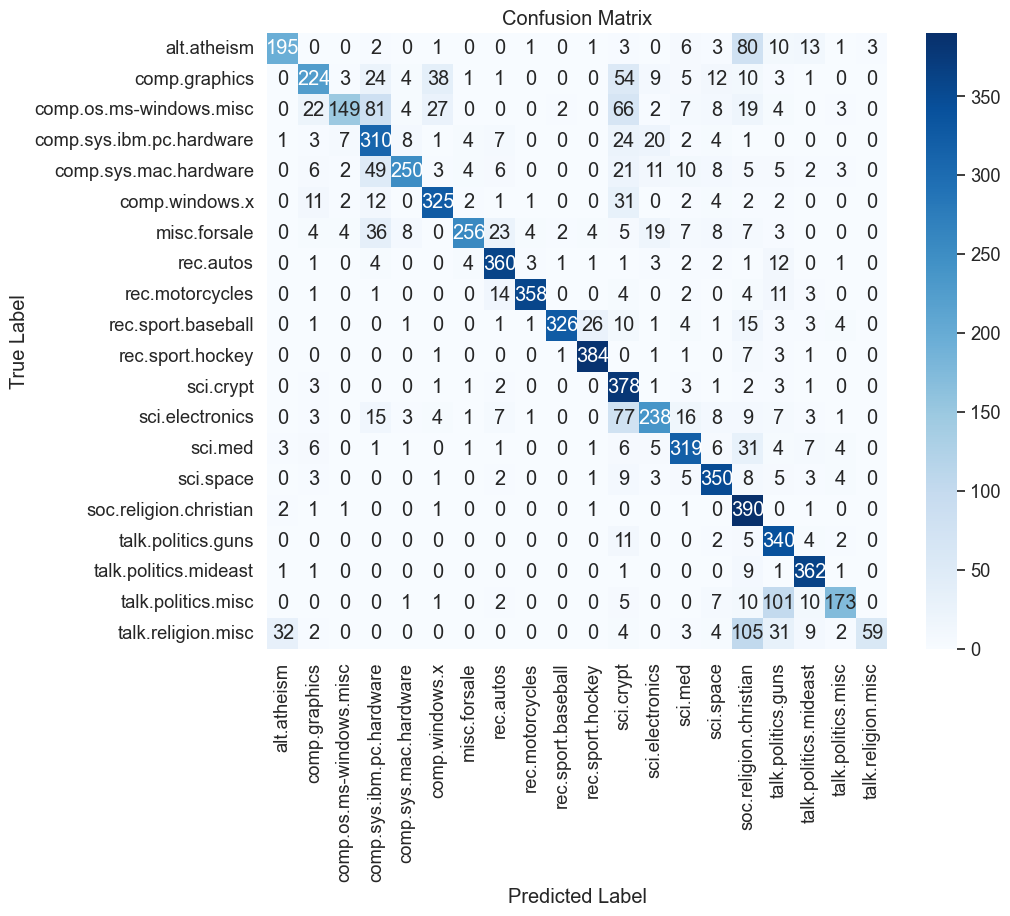

In [11]:
#VISUALIZATION(CONFUSION MATRIX)
cm = confusion_matrix(true_labels, predicted_labels, labels=categories)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

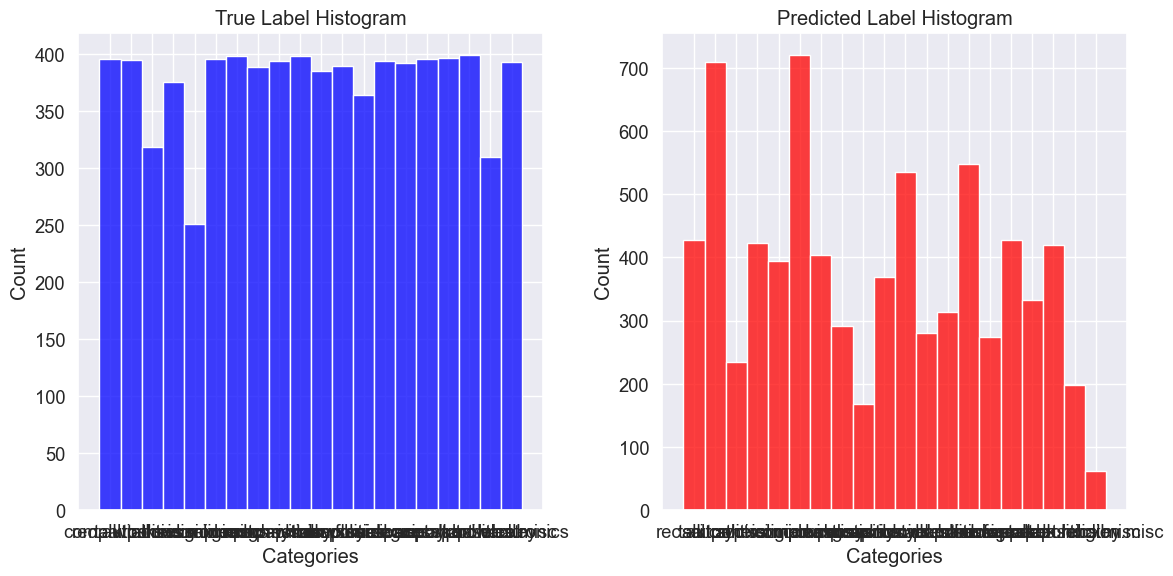

In [12]:
#VISUALIZATION(HISTOGRAM)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(true_labels, bins=len(categories), kde=False, color='blue')
plt.title("True Label Histogram")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(predicted_labels, bins=len(categories), kde=False, color='red')
plt.title("Predicted Label Histogram")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.tight_layout()
plt.show()